In [1]:
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from tqdm.contrib.itertools import product

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

In [13]:
results = []

NUM_PARTICLES = [100, 1000, 8000, 20000, 50000]
NUM_PROCS = [2, 4, 5, 10]

for num_part, num_procs in product(NUM_PARTICLES, NUM_PROCS):
    # Run parallel version
    result = subprocess.run(["./bin/parallel", str(num_part), "0.01", "10000", "1", str(num_procs)], stdout=subprocess.PIPE)
    time_parallel = float(result.stdout.decode('utf-8'))

    # Run original version
    result = subprocess.run(["./bin/md1d", str(num_part), "0.01", "10000", "1", "1"], stdout=subprocess.PIPE)
    time_original = float(result.stdout.decode('utf-8'))

    results.append({
        'num_particles': num_part,
        'num_threads': str(num_procs),
        'speed_up': time_original / time_parallel,
    })

  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
df = pd.DataFrame.from_records(results)

df.head()

,num_particles,num_threads,speed_up
0,100,2,0.370370
1,100,4,0.366972
2,100,5,0.191176
3,100,10,0.075875
4,1000,2,1.264516


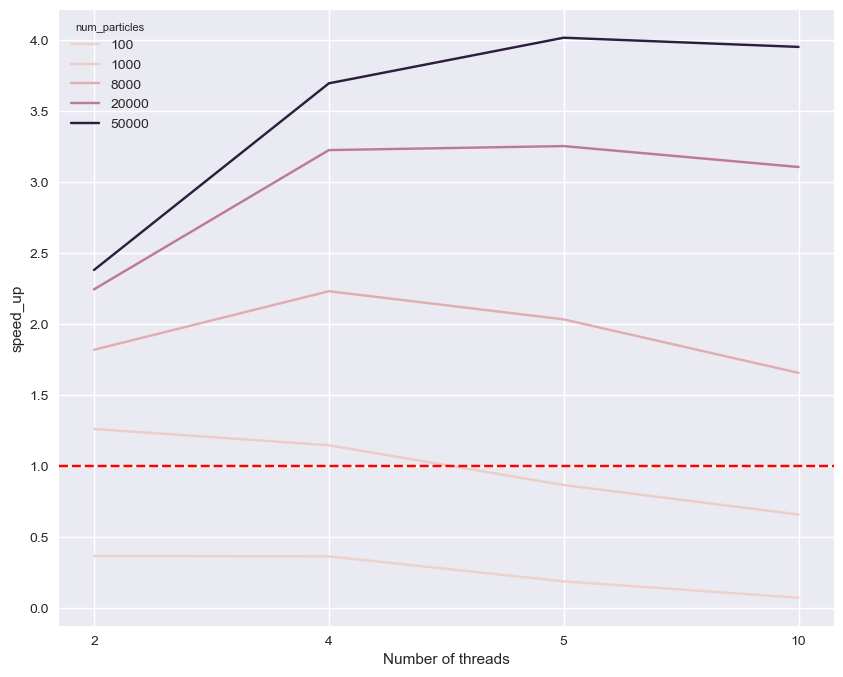

In [15]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

sns.lineplot(df, x='num_threads', y='speed_up', hue='num_particles')
ax.set_xlabel('Number of threads')
ax.axhline(y=1, c='r', linestyle='--')